In [2]:
#a model for counting granules inspired in the Coursera transfer learning lab and 
#https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/
# cannot use the alias tf to import other modules
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense,Flatten
#from tensorflow.keras.layers import Resizing,Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory as idd
from tensorflow.keras.utils import plot_model
import os

In [220]:
# Use this one or the next
# labels are contained in a text file of digits in column (one per line)
'''Y=np.loadtxt("C:\\Users\erios\images_for_training_granules\Y_list.txt", dtype='int')
y1list=list(Y) # produces a list of strings 
print(Ylist1[0:5])'''


'Y=np.loadtxt("C:\\Users\\erios\\images_for_training_granules\\Y_list.txt", dtype=\'int\')\ny1list=list(Y) # produces a list of strings \nprint(Ylist1[0:5])'

In [2]:
# labels are contained in a text file of digits in 2 columns 
# in Resnets_...5classes the first column lists the image number and the second contains the label
# in 5 classes the classes correspond aprox to # of granules
# 0 is 0, 2 is 1 or 2, 4 is 3-5, 7 is 6 or more, 9 is undefined
# Y = np.loadtxt("C:/Users/erios/images2/granules_and_locations.txt", dtype='int')
# Y = np.loadtxt("C:\\Users\erios\images_for_training_granules\Y_list2.txt", dtype='int')
Y = np.loadtxt("C:\\Users\erios\images_for_training_granules_15k\Y_list2.txt", dtype='int')
y1 = Y[:, 0]; y2 = Y[:, 1]
#y1[:10], y2[:10]
y1list = list(y1)
y2list = list(y2)


In [3]:
'''for x in range(0,10):
    print (y2list[x])'''
for x in range(0,10):
    print (y2list[x])

4
0
0
0
2
3
3
0
1
0


In [3]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
# directory = "C:/Users/erios/images_for_training_granules/"
directory = "C:/Users/erios/images_for_training_granules_15k/"
# directory = "C:/Users/erios/images2/"
# just "granules/" also works.  Forward slash / required. Back slash does not work.
# Important! put all images in one folder INSIDE directory (i.e. subfolder here/ of images2/)
# These images are now "fake RGB", i.e., three color, but all are equal.  They are the output of granule_counter.pro
# Note that directory does not include the last subfolder, 'here/', which contains the images.
# Images had to be renamed to 3 digit (001, 002, ..., 010, etc.) for sorting to work
# color_mode had to be 'rgb', 'grayscale did not work'
# shuffle had to be False, to keep correspondence between images and labels
# to invert order define a "validation split" of 0.7 and then fit with inverted role of training and validation sets
train_dataset = idd(directory,
                                             labels=y2list,
                                             label_mode='int',
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb',
#                                             color_mode='grayscale',
                                             shuffle=False,
                                             image_size=IMG_SIZE,
                                             validation_split=0.3,
                                             subset='training',
                                             seed=42)
validation_dataset = idd(directory,
                                             labels=y2list,
                                             label_mode='int',
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb',
#                                             color_mode='grayscale',
                                             shuffle=False,
                                             image_size=IMG_SIZE,
                                             validation_split=0.3,
                                             subset='validation',
                                             seed=42)

Found 2048 files belonging to 1 classes.
Using 1434 files for training.
Found 2048 files belonging to 1 classes.
Using 614 files for validation.


In [ ]:
#  THE INVERSE DATASET
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "C:/Users/erios/images_for_training_granules/"
# directory = "C:/Users/erios/images_for_training_granules_15k/"
# directory = "C:\Users\erios\images_for_training_granules\"
# directory = "C:/Users/erios/images2/"
# just "granules/" also works.  Forward slash / required. Back slash does not work.
# Important! put all images in one folder INSIDE directory (i.e. subfolder here/ of images2/)
# These images are now "fake RGB", i.e., three color, but all are equal.  They are the output of granule_counter.pro
# Note that directory does not include the last subfolder, 'here/', which contains the images.
# Images had to be renamed to 3 digit (001, 002, ..., 010, etc.) for sorting to work
# color_mode had to be 'rgb', 'grayscale did not work'
# shuffle had to be False, to keep correspondence between images and labels
# to invert order define a "validation split" of 0.7 and then fit with inverted role of training and validation sets
train_dataset = idd(directory,
                                             labels=y2list,
                                             label_mode='int',
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb',
#                                             color_mode='grayscale',
                                             shuffle=False,
                                             image_size=IMG_SIZE,
                                             validation_split=0.7,   
                                             subset='training',
                                             seed=42)
validation_dataset = idd(directory,
                                             labels=y2list,
                                             label_mode='int',
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb',
#                                             color_mode='grayscale',
                                             shuffle=False,
                                             image_size=IMG_SIZE,
                                             validation_split=0.7,
                                             subset='validation',
                                             seed=42)

In [3]:
# Use this cell for images subjet to predictions.  strangely, I named the dataset fit_dataset.
BATCH_SIZE = 32
IMG_SIZE = (224,224)
directory = "C:/Users/erios/images_3_color_no_label/"
# for some reason, the details of the above line are important
# images without label, for classification
fit_dataset = idd(directory, 
                    labels=None,
                    image_size=IMG_SIZE,
                    batch_size=32,
                    shuffle=False,
                    color_mode='rgb',
                    seed=42)

Found 15360 files belonging to 1 classes.


In [4]:
#  because images are batched, I could only show figures of batch in take()
#  to print labels above images I had to use the command shown
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

NameError: name 'train_dataset' is not defined

<Figure size 720x720 with 0 Axes>

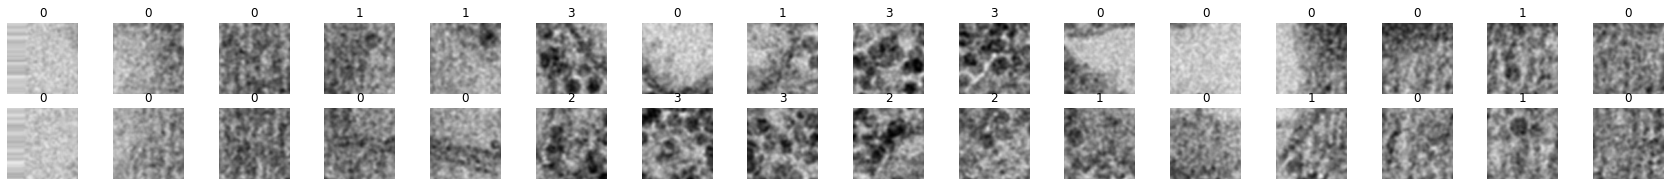

In [5]:
plt.figure(figsize=(30,6))
for images, labels in train_dataset.take(2):
    for i in range(0,32):
        ax=plt.subplot(4,16,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

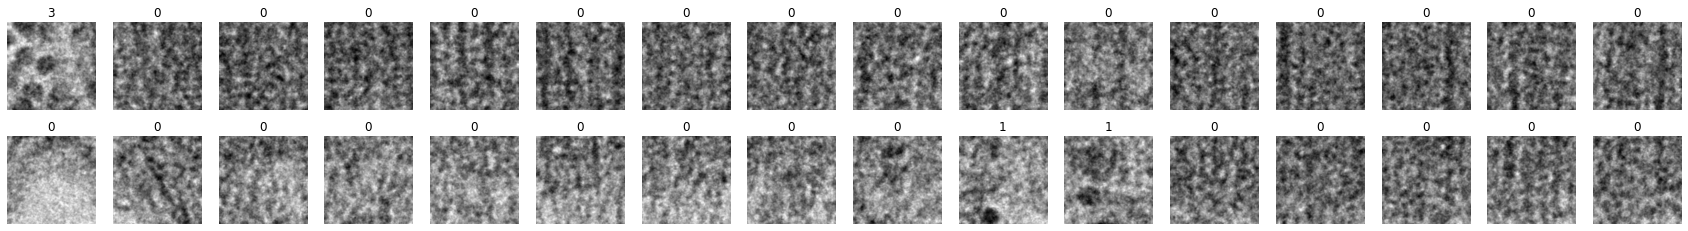

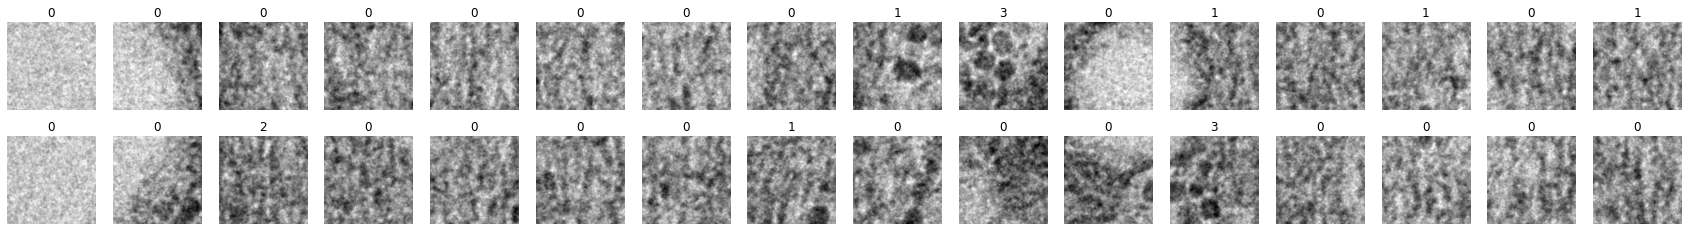

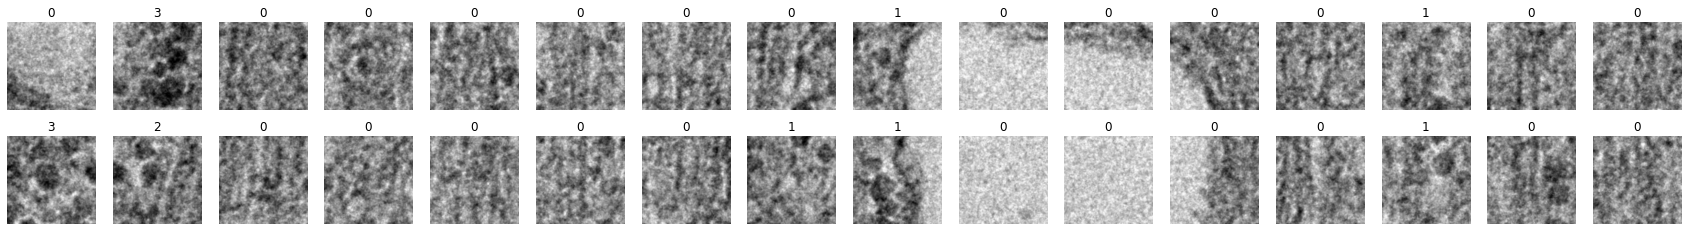

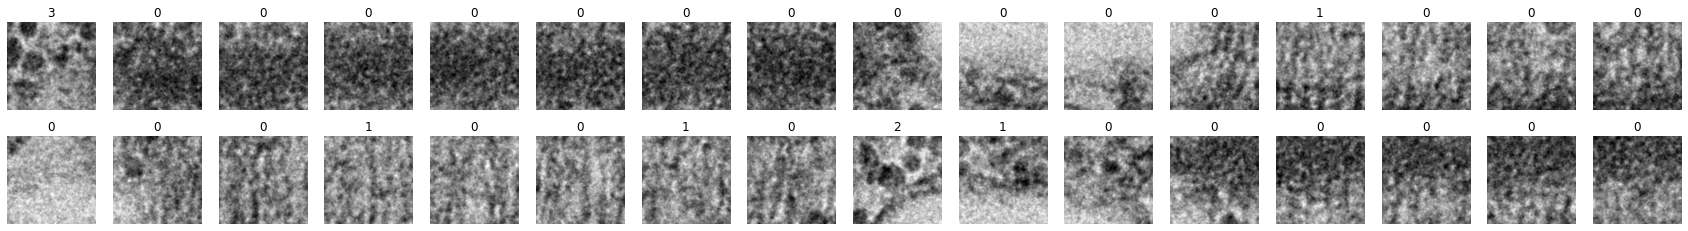

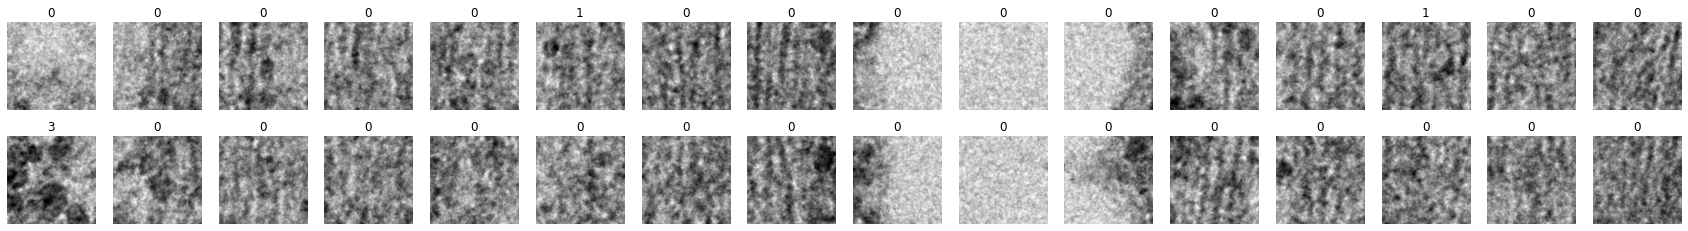

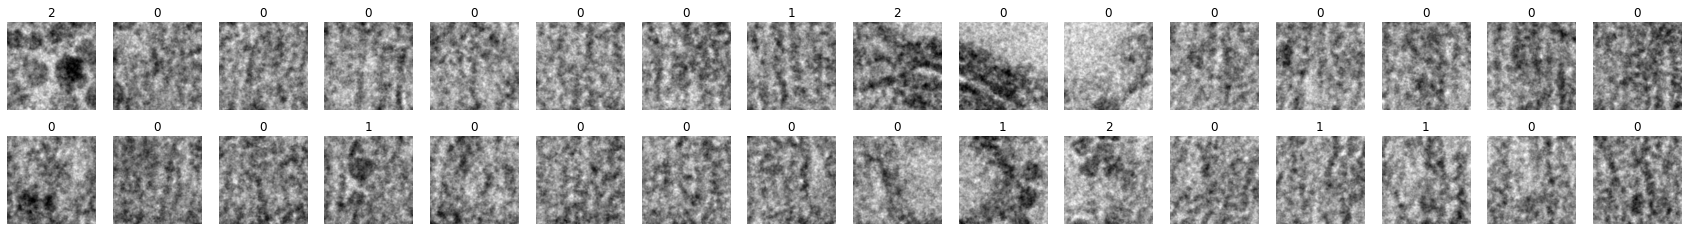

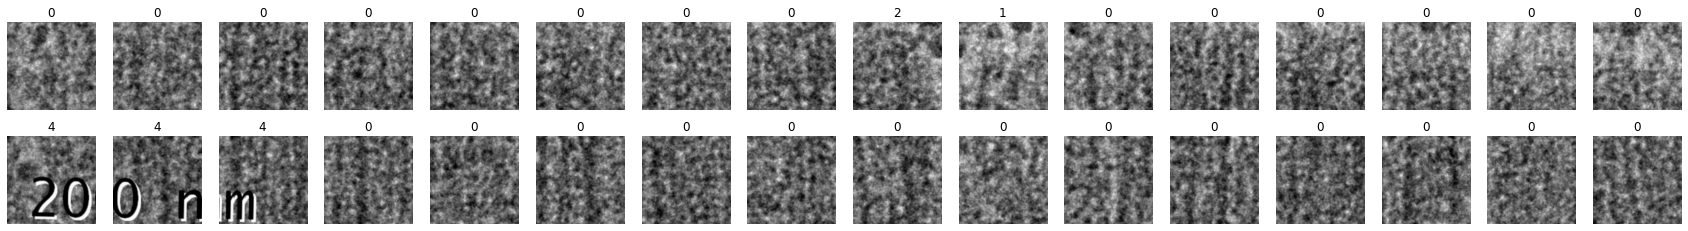

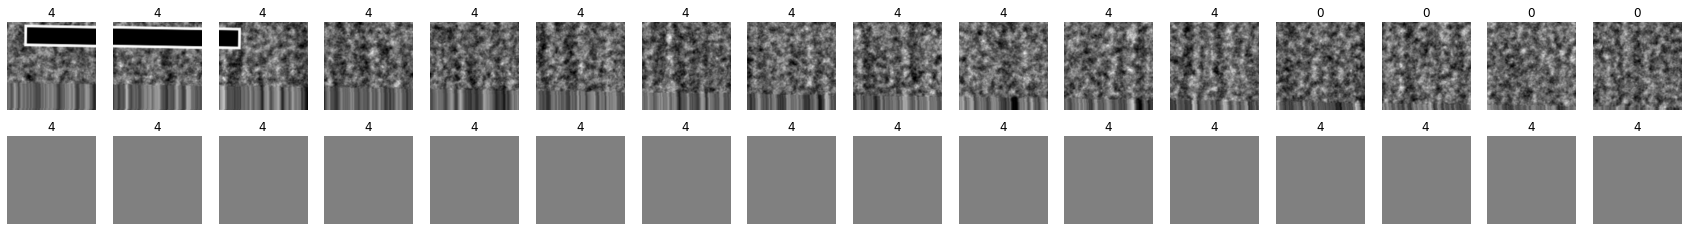

In [12]:
# to display images for prediction. 
for n in range(9,17):
    plt.figure(figsize=(30,8))
    for images in fit_dataset.take(n):
        for i in range(0,32):
            ax=plt.subplot(4,16,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(preds[(n-1)*32+i]))
            plt.axis("off")

In [6]:

# Incorporating augmentation before the pretrained model is demonstrated below
def data_augmenter():
    '''
    Create a Sequential model composed of 2 layers
    Returns:
        tf.keras.Sequential
    '''
    ### START CODE HERE
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomFlip('vertical'))
    data_augmentation.add(RandomRotation(0.2))
    ### END CODE HERE
    
    return data_augmentation

In [7]:
'''plt.figure(figsize=(30,12))
for images in fit_dataset.take(1):
    for i in range(0,32):
        ax=plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(preds[i]))
        plt.axis("off")'''

'plt.figure(figsize=(30,12))\nfor images in fit_dataset.take(1):\n    for i in range(0,32):\n        ax=plt.subplot(4,8,i+1)\n        plt.imshow(images[i].numpy().astype("uint8"))\n        plt.title(int(preds[i]))\n        plt.axis("off")'

In [7]:
data_augmentation = data_augmenter()
# never got it to work! all figures are the same
#for image, _ in train_dataset.take(1):
for image, _ in fit_dataset.take(1):
    plt.figure(figsize=(9, 9))
    first_image = image[1]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

ValueError: too many values to unpack (expected 2)

In [8]:
# Adds the pretrained model to a Sequential API (the pretrained is not sequential)
# note classes must match the new application
# input shape.  No idea why it must be 224 (=256-32)
# 3rd dimension must be 3? probably because input images are 3 color.  Don't know if they could be gray
# maybe not, because the base model was trained with color images
data_augmentation = data_augmenter()
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
#                   pooling='avg',classes=8,
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
#resnet_model.add(tf.keras.Input(shape=(224,224,3)))  #it is necessary to include this line for augmentation to work
#then compile, then run with some input.  Only after that we can see a summary.  
resnet_model.add(data_augmentation)  #when running augmentation, change pretrained layer from 0 to 1 for unfreezing
resnet_model.add(pretrained_model)
#resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

In [14]:
# Save the initial weights (for resetting to initial state)
# 'classes1' resets to state after 6 epochs of coarse training with 0.75/0.25 split of filtered data (val 0.705)
resnet_model.save_weights('./checkpoints/Resnets_for_granules_5classes1')


In [216]:
# just a demonstration
#for images, labels in train_dataset.take(2):
 # for i in range(12):
  #  print(int(labels[i]))


In [14]:
resnet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 5,517,317
Non-trainable params: 19,122,048
_________________________________________________________________


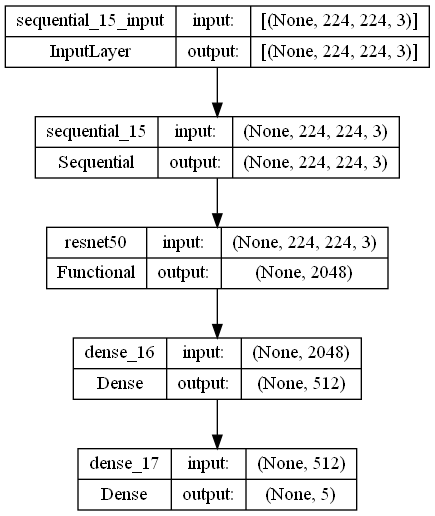

In [113]:
plot_model(resnet_model, show_shapes=True)

In [57]:
'''import os
batch_size= 32
checkpoint_path = "training_myMobileNetV2_for_granules/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq=5*batch_size,
                                                 verbose=1)'''


'import os\nbatch_size= 32\ncheckpoint_path = "training_myMobileNetV2_for_granules/cp.ckpt"\ncheckpoint_dir = os.path.dirname(checkpoint_path)\n\n# Create a callback that saves the model\'s weights\ncp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,\n                                                 save_weights_only=True,\n                                                 save_freq=5*batch_size,\n                                                 verbose=1)'

In [141]:
coarse_tuning_counter=0

In [143]:
# initial use of the model, trains just the classification layers
if coarse_tuning_counter == 0:
    initial_epochs = 4
    total_epochs = initial_epochs
    history = resnet_model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
else:
    more_epochs = 2
    total_epochs =  total_epochs + more_epochs
#    history = resnet_model.fit(train_dataset,
    history = resnet_model.fit(train_dataset,      #these lines invert the role of train and validation sets
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1]+1,
                         validation_data=validation_dataset)
coarse_tuning_counter += 1    

Epoch 5/6
56/56 [==============================] - 87s 2s/step - loss: 0.8840 - accuracy: 0.6713 - val_loss: 0.8302 - val_accuracy: 0.6615
Epoch 6/6
56/56 [==============================] - 89s 2s/step - loss: 0.8749 - accuracy: 0.6669 - val_loss: 0.7990 - val_accuracy: 0.6667


In [155]:
# initial use of the model, trains just the classification layers, this with "inverted" roles of training and validation
if coarse_tuning_counter == 0:
    initial_epochs = 4
    total_epochs = initial_epochs
    history = resnet_model.fit(validation_dataset, validation_data=train_dataset, epochs=initial_epochs)
else:
    more_epochs = 2
    total_epochs =  total_epochs + more_epochs
    history = resnet_model.fit(validation_dataset,      #these lines invert the role of train and validation sets
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1]+1,
#                         validation_data=validation_dataset)
                         validation_data=train_dataset)
coarse_tuning_counter += 1    

Epoch 7/13
24/24 [==============================] - 95s 4s/step - loss: 1.0926 - accuracy: 0.6224 - val_loss: 0.8702 - val_accuracy: 0.6657
Epoch 8/13
24/24 [==============================] - 91s 4s/step - loss: 0.8707 - accuracy: 0.6771 - val_loss: 0.9818 - val_accuracy: 0.6177
Epoch 9/13
24/24 [==============================] - 91s 4s/step - loss: 0.9392 - accuracy: 0.6419 - val_loss: 0.8653 - val_accuracy: 0.6780
Epoch 10/13
24/24 [==============================] - 91s 4s/step - loss: 0.8787 - accuracy: 0.6589 - val_loss: 0.8548 - val_accuracy: 0.6881
Epoch 11/13
24/24 [==============================] - 91s 4s/step - loss: 0.8059 - accuracy: 0.6940 - val_loss: 1.0061 - val_accuracy: 0.6635
Epoch 12/13
24/24 [==============================] - 91s 4s/step - loss: 0.8196 - accuracy: 0.6914 - val_loss: 1.0976 - val_accuracy: 0.6596
Epoch 13/13
24/24 [==============================] - 91s 4s/step - loss: 0.8291 - accuracy: 0.6628 - val_loss: 1.1952 - val_accuracy: 0.6702


In [159]:
# SAVE
# SAVE
#  weights 5Classes2 after 8 coarse with inverted set.  val acc 0.794 on filtered imgs 15k. Used full augment.
# Used 0.25/0.75 split.  "inverted"

#  weights 5Classes3 after 8 coarse and 3 fine starting at 169 with straight set.  val acc 0.797 on filtered imgs 15k. Used full augment.
# Used 0.25/0.75 split.  
#  weights 5Classes4 after 8 coarse and 7 fine starting at 164 with inverted set.  val acc 0.828 on filtered imgs 15k. Used full augment.
# Used 0.25/0.75 split.  "inverted" see text cell below
# 5classes01 is after 7 coarse epochs with data from /images_for_training_granules/ (original 29k images)
# 5classes02 is after 7 coarse epochs and 20 fine training from 149 with data from /images_for_training_granules/ (original 29k images)
# accuracy 0.703
# loss: 1.0902 - accuracy: 0.6354 - val_loss: 1.0016 - val_accuracy: 0.710, fine from 149, stored as 5classes03
# 5classes04 after 4 coarse reached 0.67, val accuracy 0.58  using "inverted" set.
# 05 after 6 epochs of coarse tuning /images for training granules/
# 06 after 3 of fine training from 170, 0.722 accuracy
resnet_model.save_weights('./checkpoints/Resnets_for_granules_5classes06')

In [ ]:
#  weights 5Classes4 after 8 coarse and 7 fine starting at 164 with inverted set.  val acc 0.828 on filtered imgs 15k. Used full augment.
# Used 0.25/0.75 split.  "inverted" 
'''Epoch 14/15
48/48 [==============================] - 75s 2s/step - loss: 0.5703 - accuracy: 0.8014 - val_loss: 0.5009 - val_accuracy: 0.8047
Epoch 15/15
48/48 [==============================] - 76s 2s/step - loss: 0.5318 - accuracy: 0.8040 - val_loss: 0.4657 - val_accuracy: 0.8281'''

In [10]:
# LOAD.  use CAREFULLY
#  weights (for resetting to saved state)
#  see notes above to decide what weights to reload
resnet_model.load_weights('./checkpoints/Resnets_for_granules_5classes4')


In [13]:
# now with fine tuning.  Trains more layers and uses a 10x lower learning rate
base_model = resnet_model.layers[1]  # note location of base model ResNets50 at layer 0 or 1 if augmented
base_model.trainable = True
fine_tune_at = 164
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
resnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [157]:
fine_tuning_counter=0

In [163]:
more_epochs = 2
total_epochs =  total_epochs + more_epochs
if fine_tuning_counter == 0:
    history_fine = resnet_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
#                         callbacks=[cp_callback])
                         validation_data=validation_dataset)

else:
    history_fine = resnet_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history_fine.epoch[-1]+1,
#                         callbacks=[cp_callback])
                         validation_data=validation_dataset)
fine_tuning_counter += 1

Epoch 18/19
56/56 [==============================] - 101s 2s/step - loss: 0.7069 - accuracy: 0.7360 - val_loss: 0.7360 - val_accuracy: 0.7096
Epoch 19/19
56/56 [==============================] - 96s 2s/step - loss: 0.6945 - accuracy: 0.7416 - val_loss: 0.7312 - val_accuracy: 0.7096


In [ ]:
more_epochs = 3
total_epochs =  total_epochs + more_epochs
if fine_tuning_counter == 0:
#    history_fine = resnet_model.fit(train_dataset,
    history_fine = resnet_model.fit(validation_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
#                         callbacks=[cp_callback])
                         validation_data=train_dataset)

else:
#        history_fine = resnet_model.fit(train_dataset,
        history_fine = resnet_model.fit(validation_dataset,
                         epochs=total_epochs,
                         initial_epoch=history_fine.epoch[-1]+1,
#                         callbacks=[cp_callback])
                         validation_data=train_dataset)
fine_tuning_counter += 1

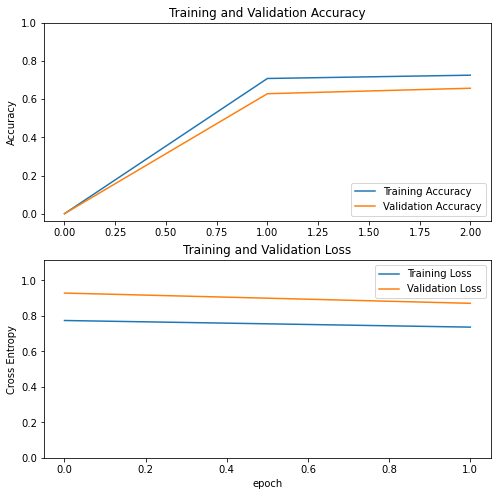

In [98]:
# to graph the fine tuning stages it seems necessary to start by graphing the initial stage
acc = [0.] + history.history['accuracy']   #includes a starting point at 0,0.  will work without it.
val_acc = [0.] + history.history['val_accuracy']
#acc =  history.history['accuracy']
#val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.2*max(val_loss)])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

plt.show()

In [195]:
# now we can plot all stages
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

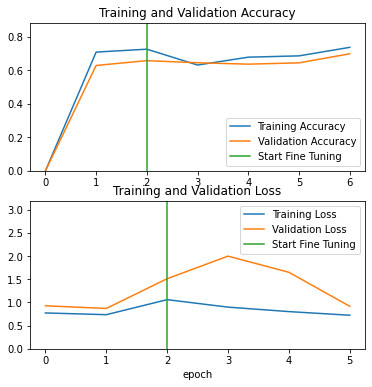

In [113]:
# now we can plot all stages
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1.2*max(acc)])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.6*max(val_loss)])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [11]:
probs = resnet_model.predict(fit_dataset)
preds = probs.argmax(axis=-1)

480/480 [==============================] - 509s 1s/step


In [15]:
textstring = ("C:/Users/erios/images_3_color_no_label/pred_granules.txt")
with open(textstring, 'wb') as f:
    np.savetxt(f, preds, '%3i', newline = ' ')
f.close()


In [167]:
print(len(preds))

5376


In [26]:
textstring = ("C:/Users/erios/images_3_color_no_label/pred_granules_column.txt")
f = open(textstring, "w")
for i in range(len(preds)):
    f.write("\n"+str(i)+"   "+str(preds[i]))
f.close()   

In [172]:
textstring = ("C:/Users/erios/images_for_prediction_September22/pred_granules_column.txt")
f = open(textstring, "w")
for i in range(len(preds)):
    f.write("\n"+str(i+2816)+"   "+str(preds[i]))
f.close()   